In [3]:
## 다음 자료는 캘리포니아 주택가격자료입니다. 
#### 이 데이터를 가지고 함께 eda를 진행해보도록 하겠습니다
## 데이터를 가져옵니다. .
import pandas as pd
import matplotlib.pyplot as plt
cali = pd.read_csv("C://Users//test//Desktop//BOAZ//assignment//4th_visualization//cali.csv")

In [4]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [5]:
##가장 눈에 띄는 변수는 ocean_proximity이다.factor형 변수인듯. 몇개로 구성되어있는지 확인.
cali['ocean_proximity'].unique()

##Near Bay, 1th Ocean, Inland, Near Ocean, Island 총 5개가 있다. 

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## df.plot.barh()를 이용하여 total_bedrooms population household의 ocean_proximity 별 평균을 시각화해보아라

In [14]:
## 이 다섯개 ocean_proximity 에 따른 housing_median_age, total_rooms, total_bedrooms, population, households, median_income을 알고 싶다면?
## 각각 평균을 내고 ocean_proximity 에 따라 bar plot을 그리면 된다. 
## (1) 먼저 이에 해당되는 dataframe 형성(groupby)
## 이때 total rooms 와 median_house_value housing_median_age는 단위가 혼자 튀기 때문에 이 두변수를 제거한 dataframe을 만들어줍니다. 
cali1 = cali[["total_bedrooms","population","households","ocean_proximity"]]

cali2 = cali1.groupby("ocean_proximity")
cali2.head()

,total_bedrooms,population,households,ocean_proximity
0,129.0,322,126,NEAR BAY
1,1106.0,2401,1138,NEAR BAY
2,190.0,496,177,NEAR BAY
3,235.0,558,219,NEAR BAY
4,280.0,565,259,NEAR BAY
701,194.0,485,171,<1H OCEAN
830,711.0,2341,703,<1H OCEAN
859,783.0,2172,789,<1H OCEAN
860,597.0,1777,559,<1H OCEAN
861,1031.0,2079,975,<1H OCEAN


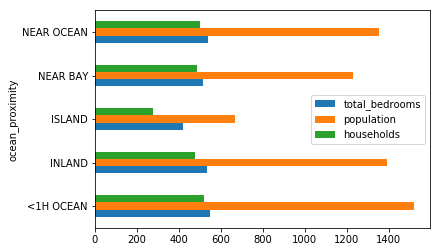

In [19]:
cali3 = cali2.mean()
cali3.head()
cali3.plot.barh()

## Subplot을 이용하여 4개의 그래프를 만들어라! 

In [74]:
## 변수들 모두 subplot을 한 눈에 알아볼 수 있게 배열 할 수 있다. 
## 4개의 dataframe형성 
cali4 = cali[['total_bedrooms','population','households','total_rooms','ocean_proximity']].groupby(['ocean_proximity']).mean()

Text(0.5,1,'total_rooms')

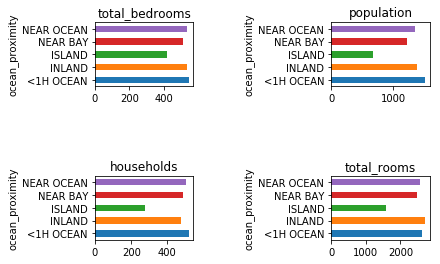

In [81]:
plt.subplot(3,3,1)
cali4['total_bedrooms'].plot.barh()
plt.title('total_bedrooms')

plt.subplot(3,3,3)
cali4['population'].plot.barh()
plt.title('population')

plt.subplot(3,3,7)
cali4['households'].plot.barh()
plt.title('households')

plt.subplot(3,3,9)
cali4['total_rooms'].plot.barh()
plt.title('total_rooms')

## Median_income 과 Median_house_value의 Scatterplot을 그려보자

In [85]:
mi = cali['median_income']
mhv = cali['median_house_value']

Text(0,0.5,'median_house_value')

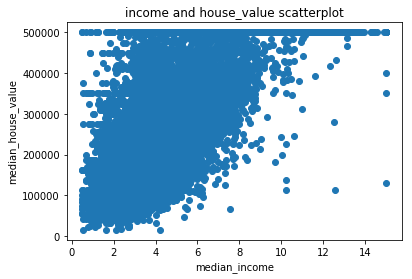

In [90]:
plt.scatter(mi,mhv)
plt.title('income and house_value scatterplot')
plt.xlabel('median_income')
plt.ylabel('median_house_value')

In [91]:
##색깔을 입혀보자. 거주지역이 NEAR_BAY인 사람들과 아닌 사람들로 나눠서 보고싶다면?
cols = []
for i in cali['ocean_proximity']:
    choice = 0
    if i == 'NEAR OCEAN':
        choice = 1
        
    else:
        choice = 2
    cols.append(choice)

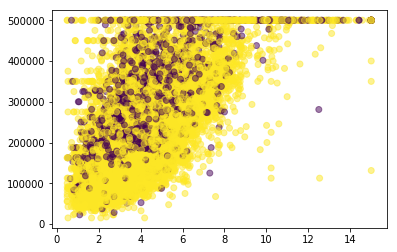

In [94]:
plt.scatter(mi,mhv,c=cols,alpha = 0.5)

## 위도와 경도 자료를 활용, size는 population/100, color를 median_house value로 해서 지도를 그려보아라

In [96]:
Latitude = cali['latitude']
Longitude = cali['longitude']

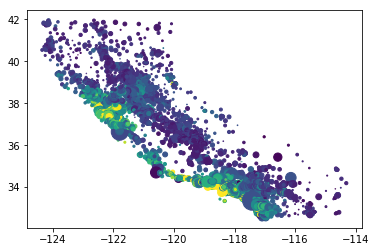

In [99]:
plt.scatter(Longitude,Latitude,c = cali['median_house_value'], s = cali['population']/100)